# Hubbard parameter calculations for figures

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


# Equalization

## 1D chain

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [8 1]
Lattice: lattice constants: [1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[56 20 20] is set.
DVR: R0=[8.425 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-5.425  0.   ]
 [-3.875  0.   ]
 [-2.325  0.   ]
 [-0.775  0.   ]]
Lattice: Full lattice sizes updated to: [8 1 1]
Lattice: lattice constants updated to: [1.55 1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[56 20 20] is set.
DVR:

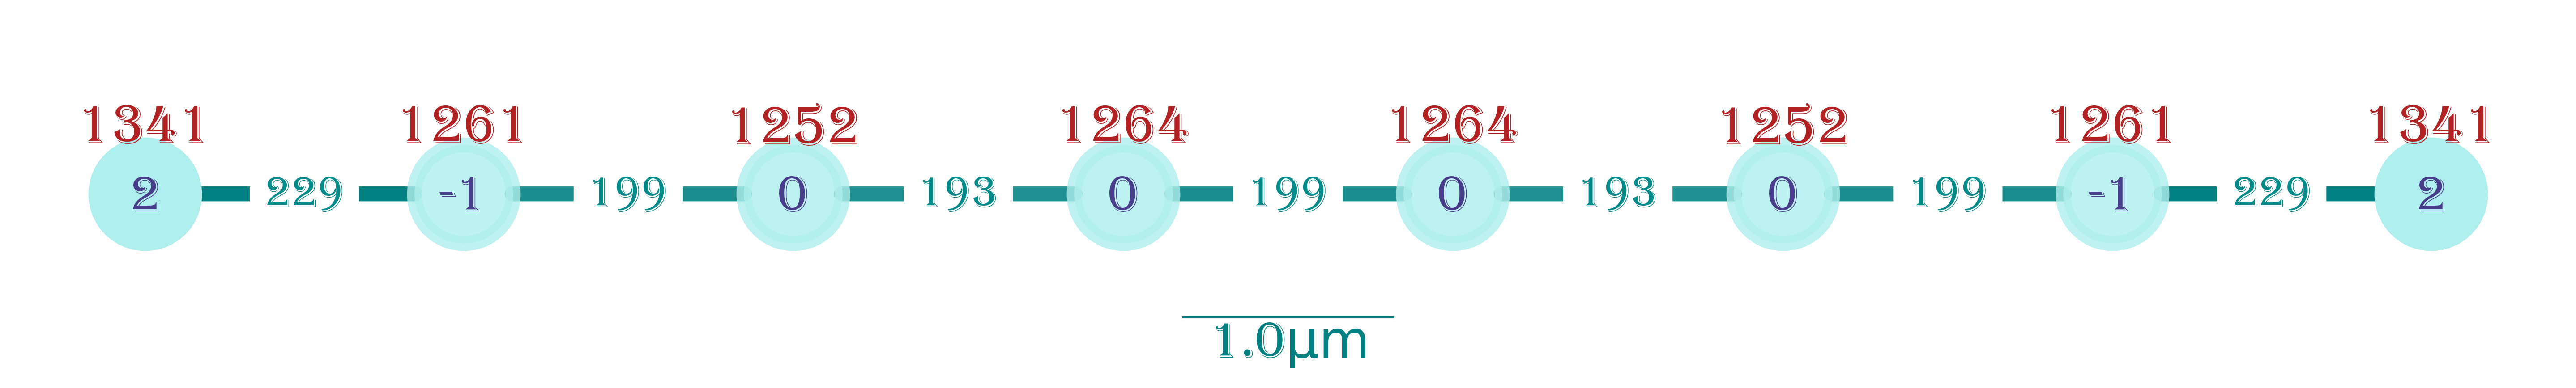

In [2]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550,),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    waist=w,
    equalize_V0=False,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
t = np.array([G.graph[edge[0]][edge[1]]["weight"] for edge in G.graph.edges])
V = np.diag(G.A)
print("t max_err = ", (np.max(t) - np.min(t)) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(G.U) - np.min(G.U)) / G.sf)

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [8 1]
Lattice: lattice constants: [1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[56 20 20] is set.
DVR: R0=[8.425 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1.]
Equalize: Initial waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: Initial trap centers:
[[-5.425  0.   ]
 [-3.875  0.   ]
 [-2.325  0.   ]
 [-0.775  0.   ]]
Lattice: Full lattice sizes updated to: [8 1 1]
Lattice: lattice constants updated to: [1.55 1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
D

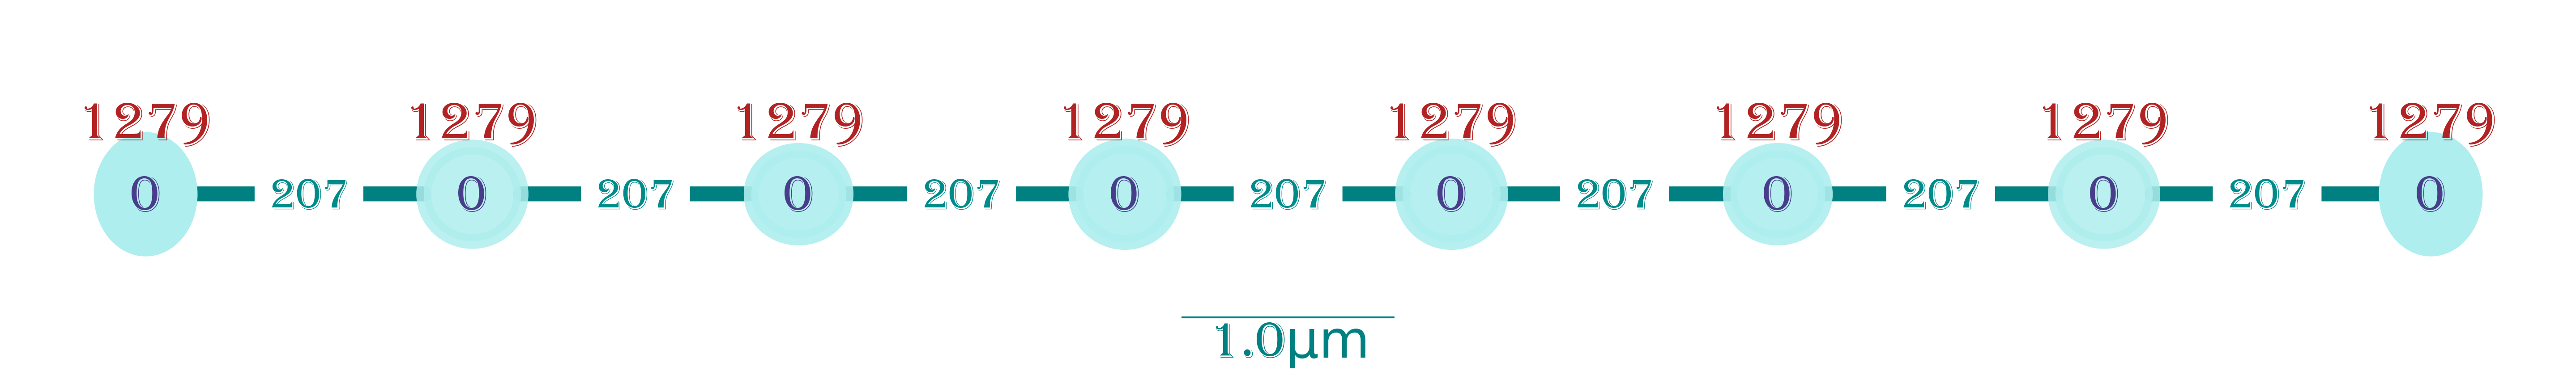

In [3]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = "square"
w = "x"
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550,),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
t = G.nn_tunneling(maskedA)
V = np.diag(maskedA)
print("t max_err = ", (np.max(t) - np.min(t)) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)

## 2D lattices

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [3 3]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [3 3 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4

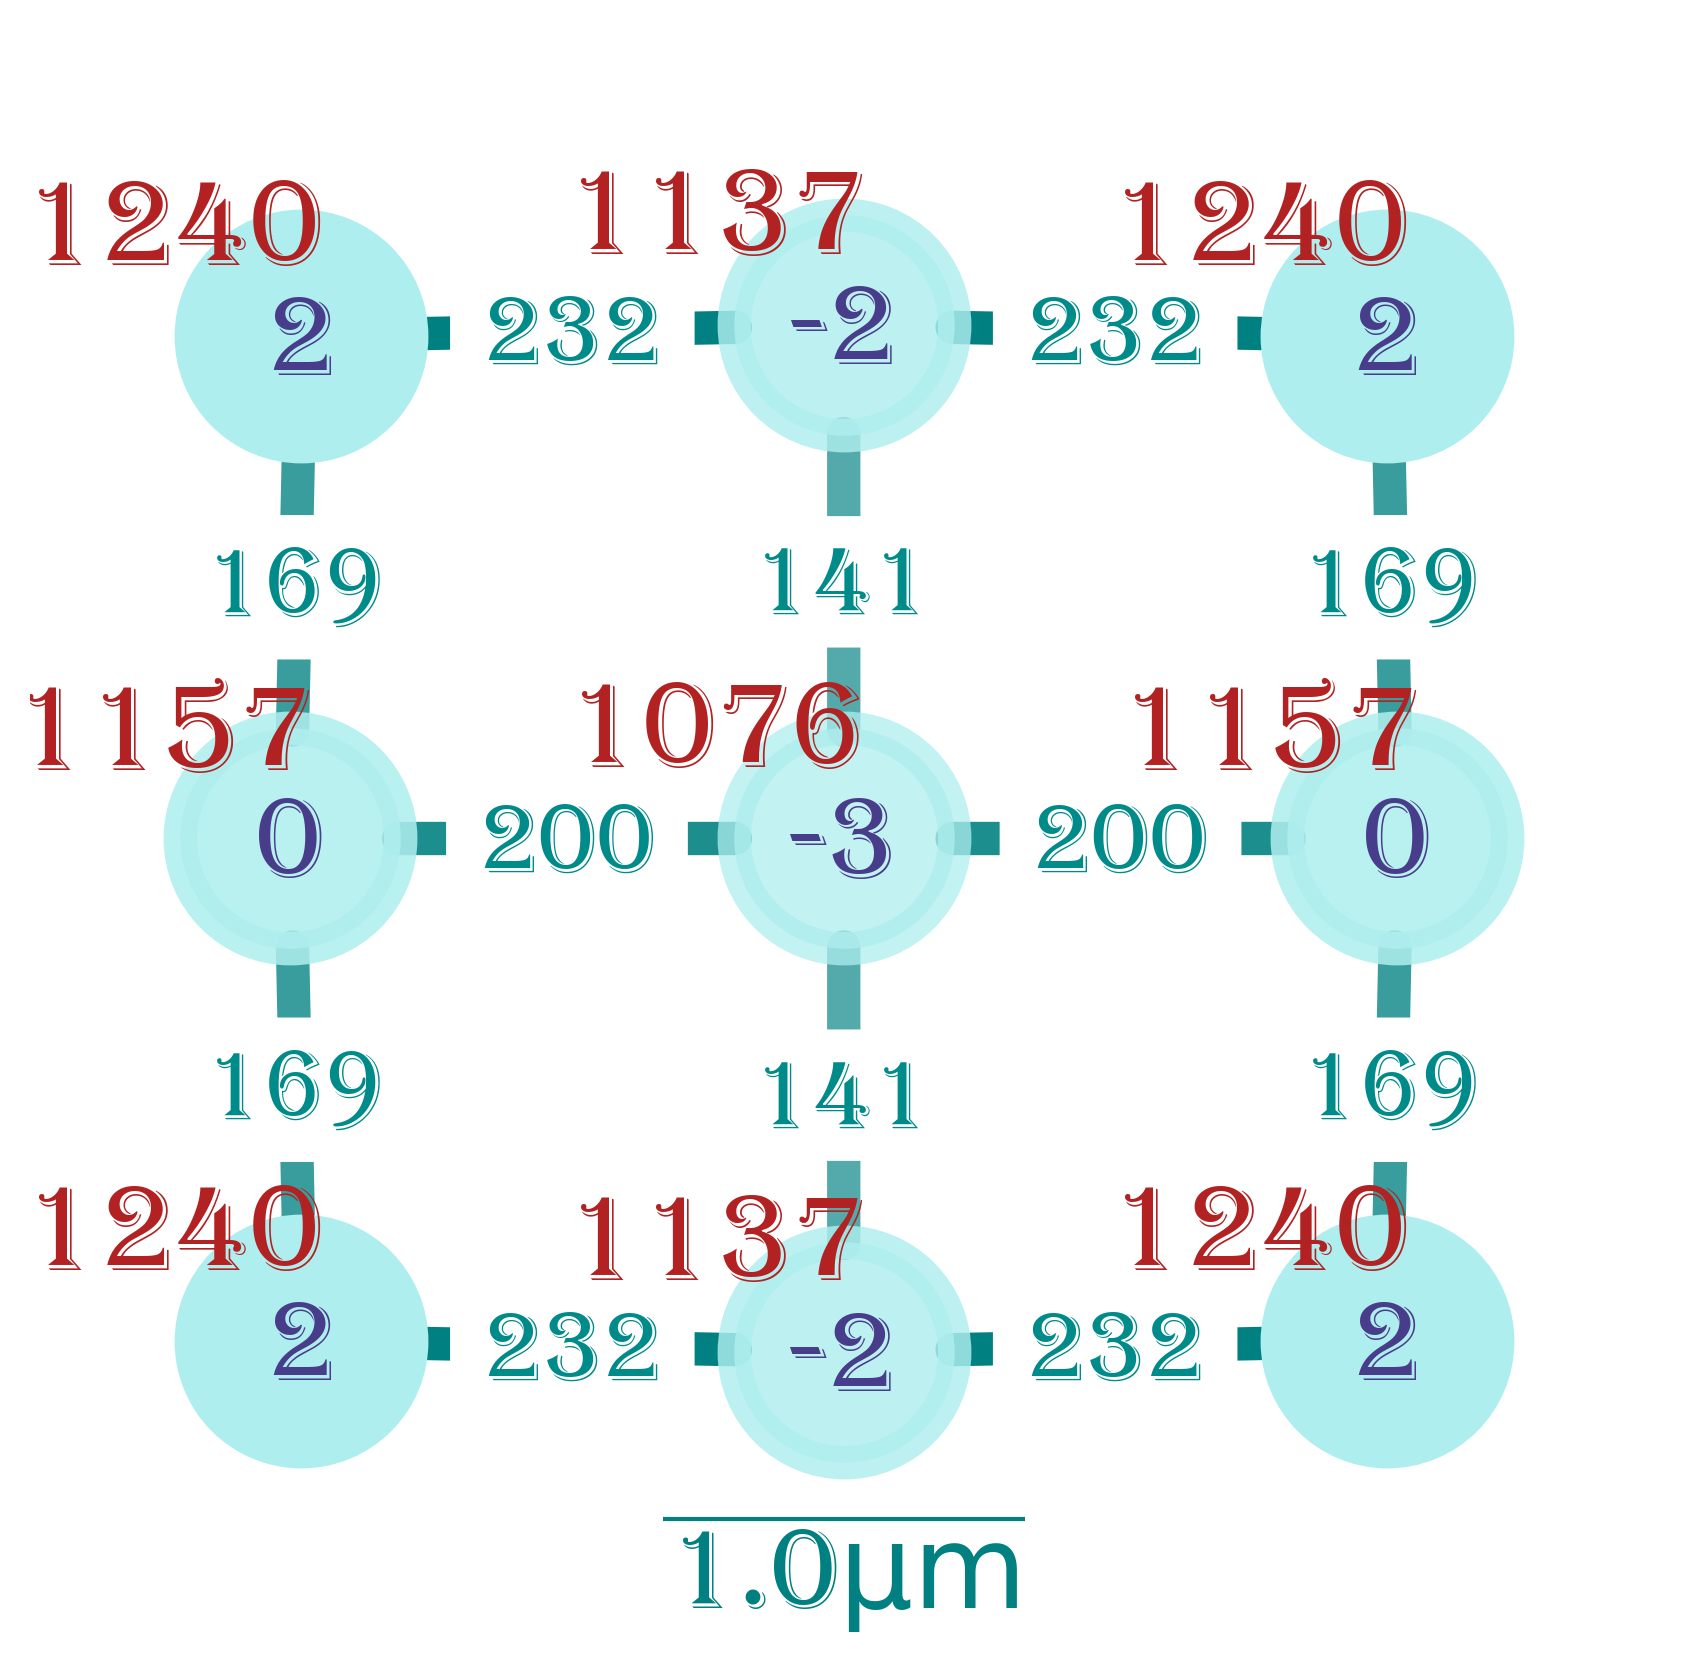

In [3]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = "square"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    sparse=True,
    shape=shape,
    waist=w,
    equalize_V0=False,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=False,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [3 3]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1.]
Equalize: Initial waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: Initial trap centers:
[[-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [3 3 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.1

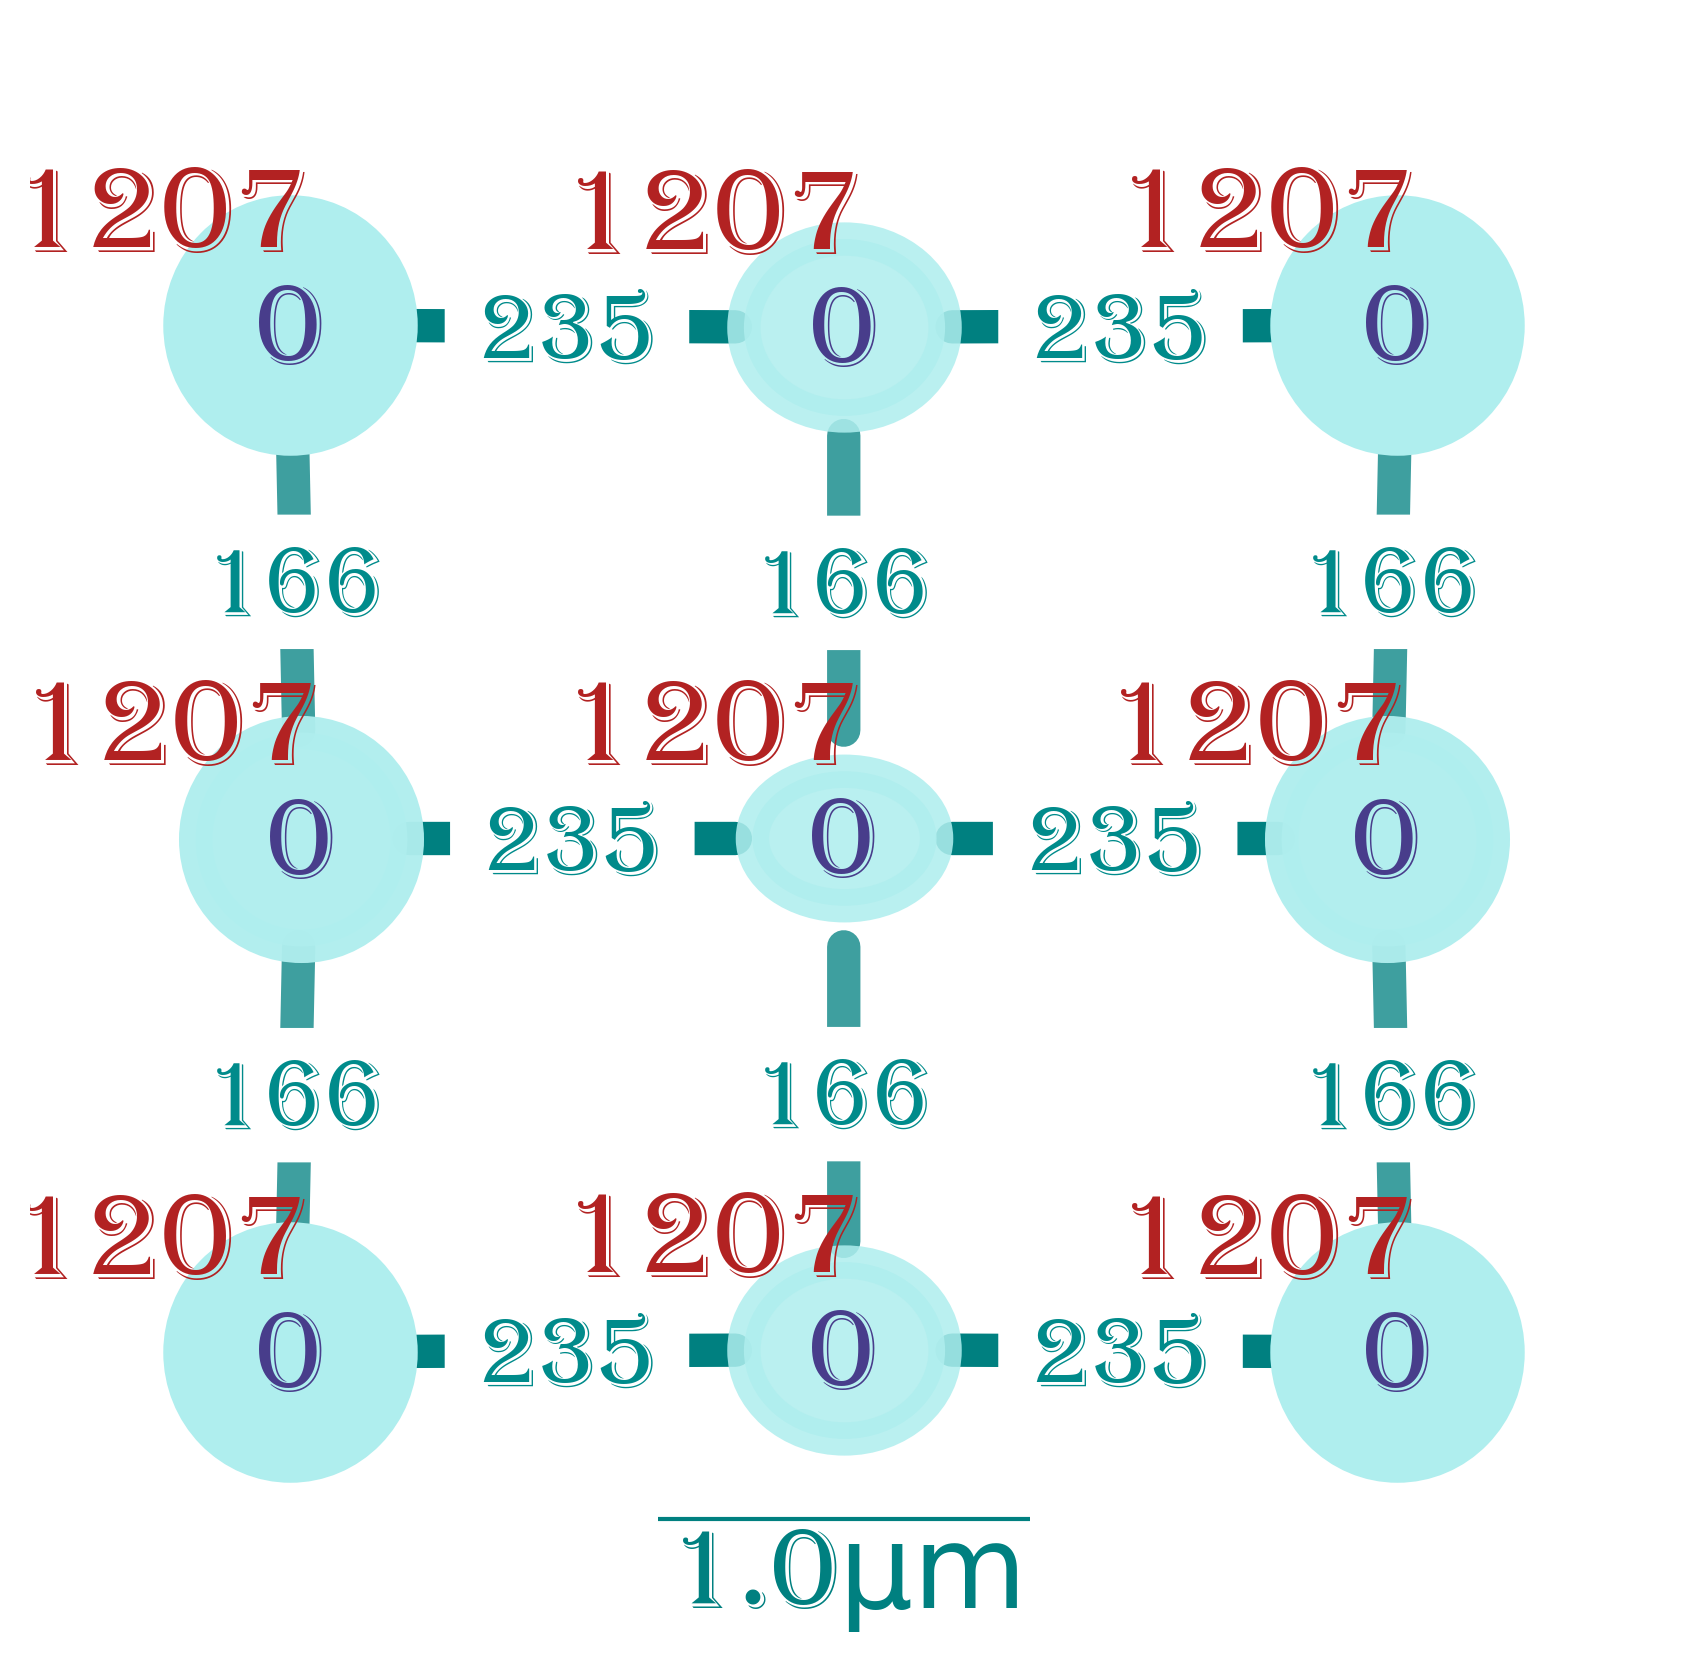

In [4]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = "square"
w = "xy"
eqt = "UvT"
meth = "praxis"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lieb lattice size adjust to: [3 3]
Lattice: lattice shape is Lieb; lattice constants set to: (1550, 1600)
Lattice: lattice shape is Lieb
Lattice: Full lattice sizes: [3 3]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1.]
Equalize: Initial trap centers:
[[-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -1.6 ]]
Lattice: Full lattice sizes updated to: [3 3 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DV

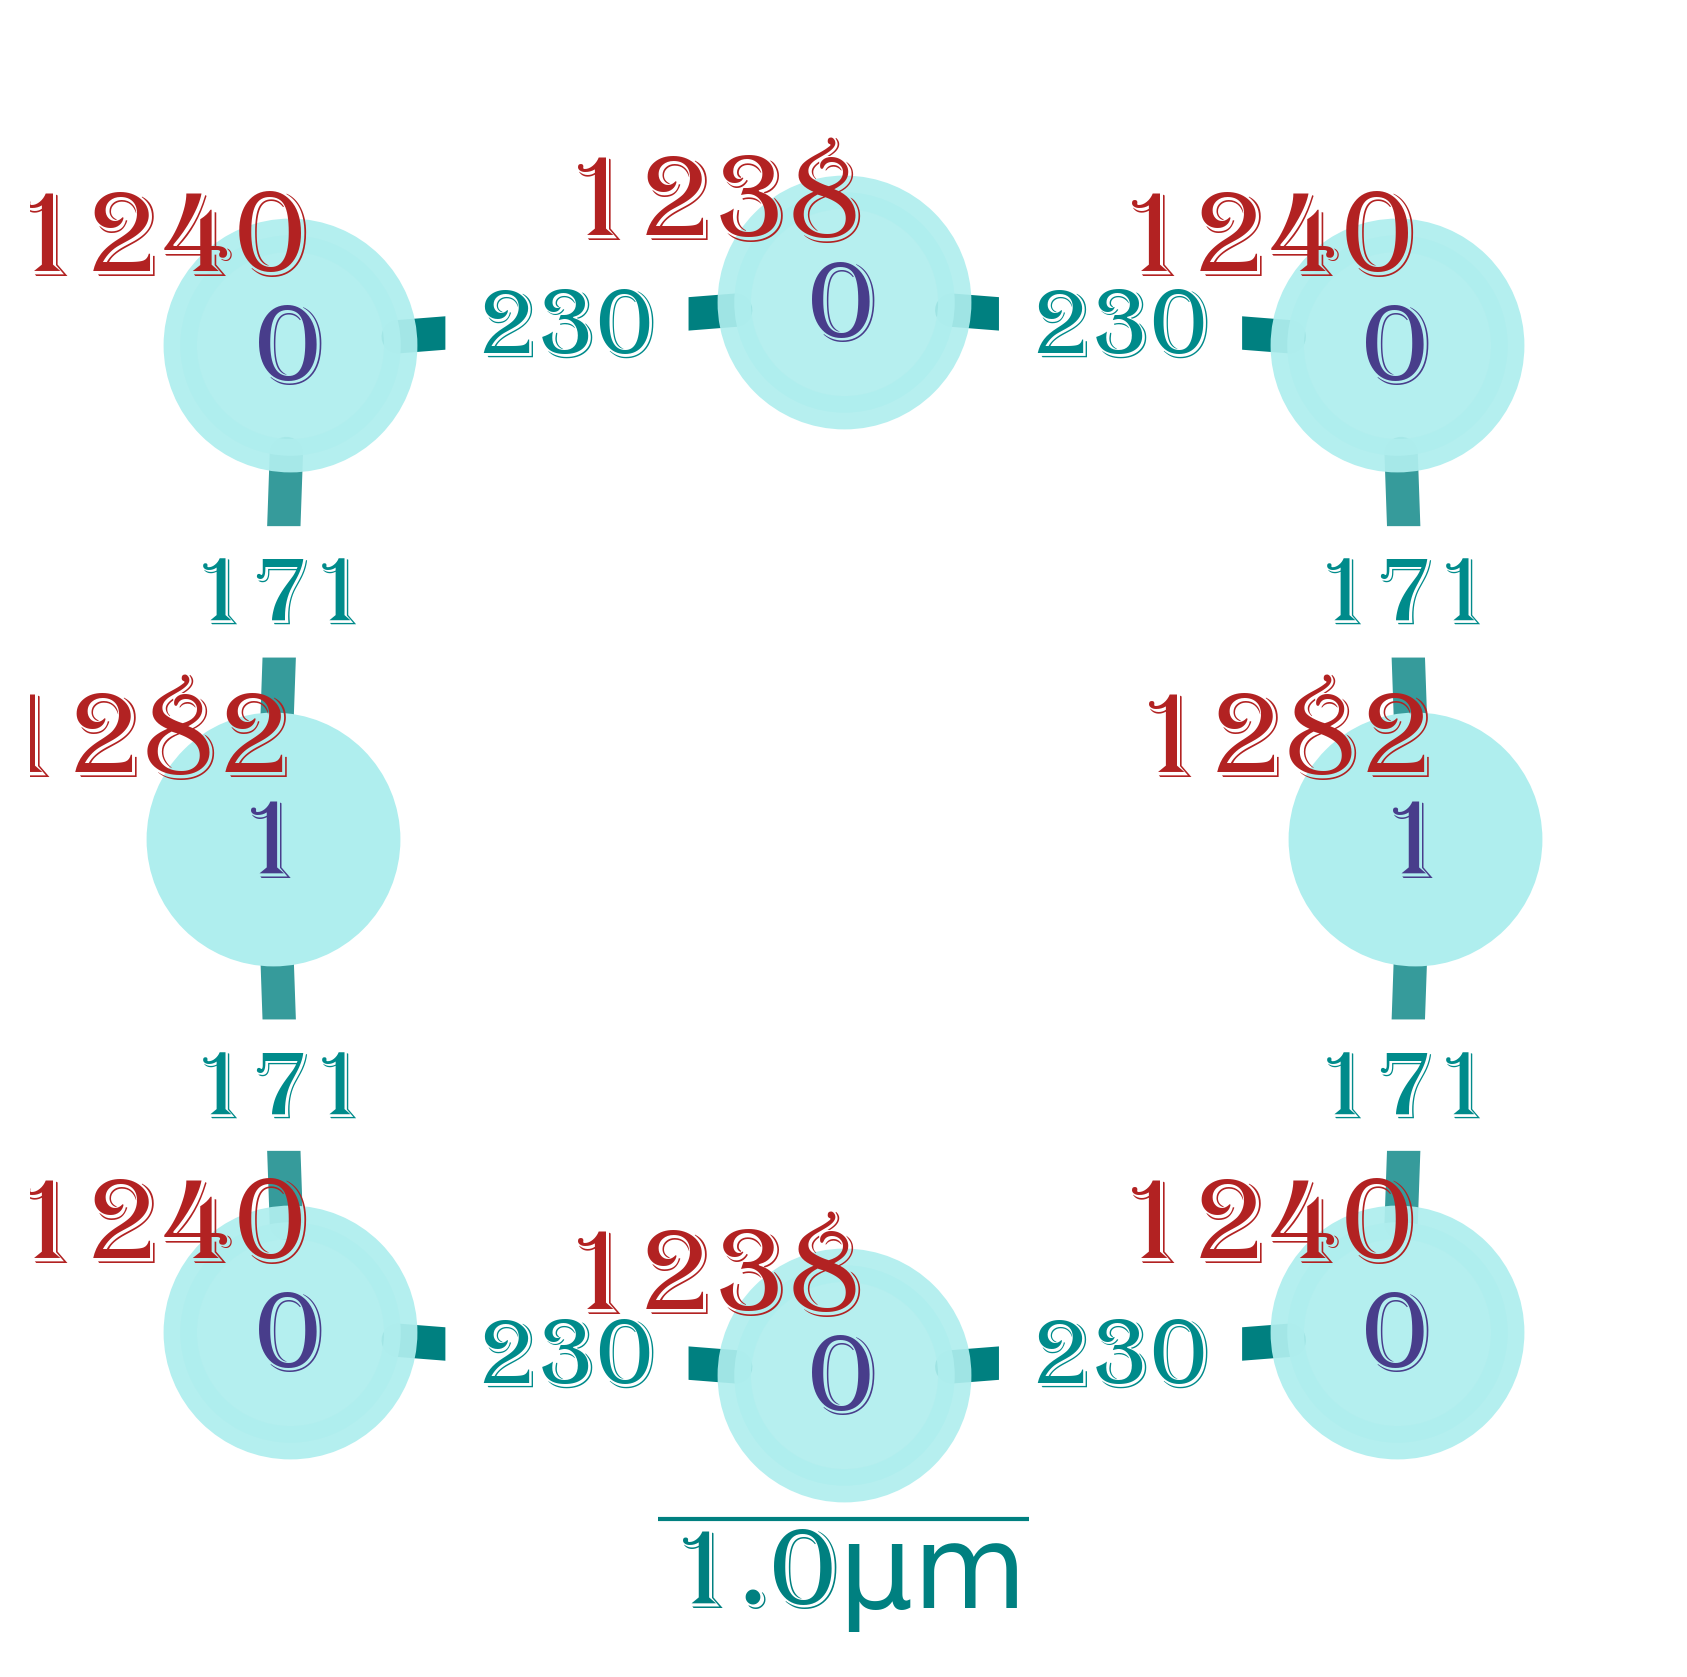

In [6]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "NM"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    equalize_V0=False,
    waist=w,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lieb lattice size adjust to: [3 3]
Lattice: lattice shape is Lieb; lattice constants set to: (1550, 1600)
Lattice: lattice shape is Lieb
Lattice: Full lattice sizes: [3 3]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 30 20] is set.
DVR: R0=[4.55 4.6  7.2 ]w is set.
Equalize: scale_factor is not a number. Set to None.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1.]
Equalize: Initial waists:
[[1. 1.]
 [1. 1.]
 [1. 1.]]
Equalize: Initial trap centers:
[[-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -1.6 ]]
Lattice: Full lattice sizes updated to: [3 3 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=

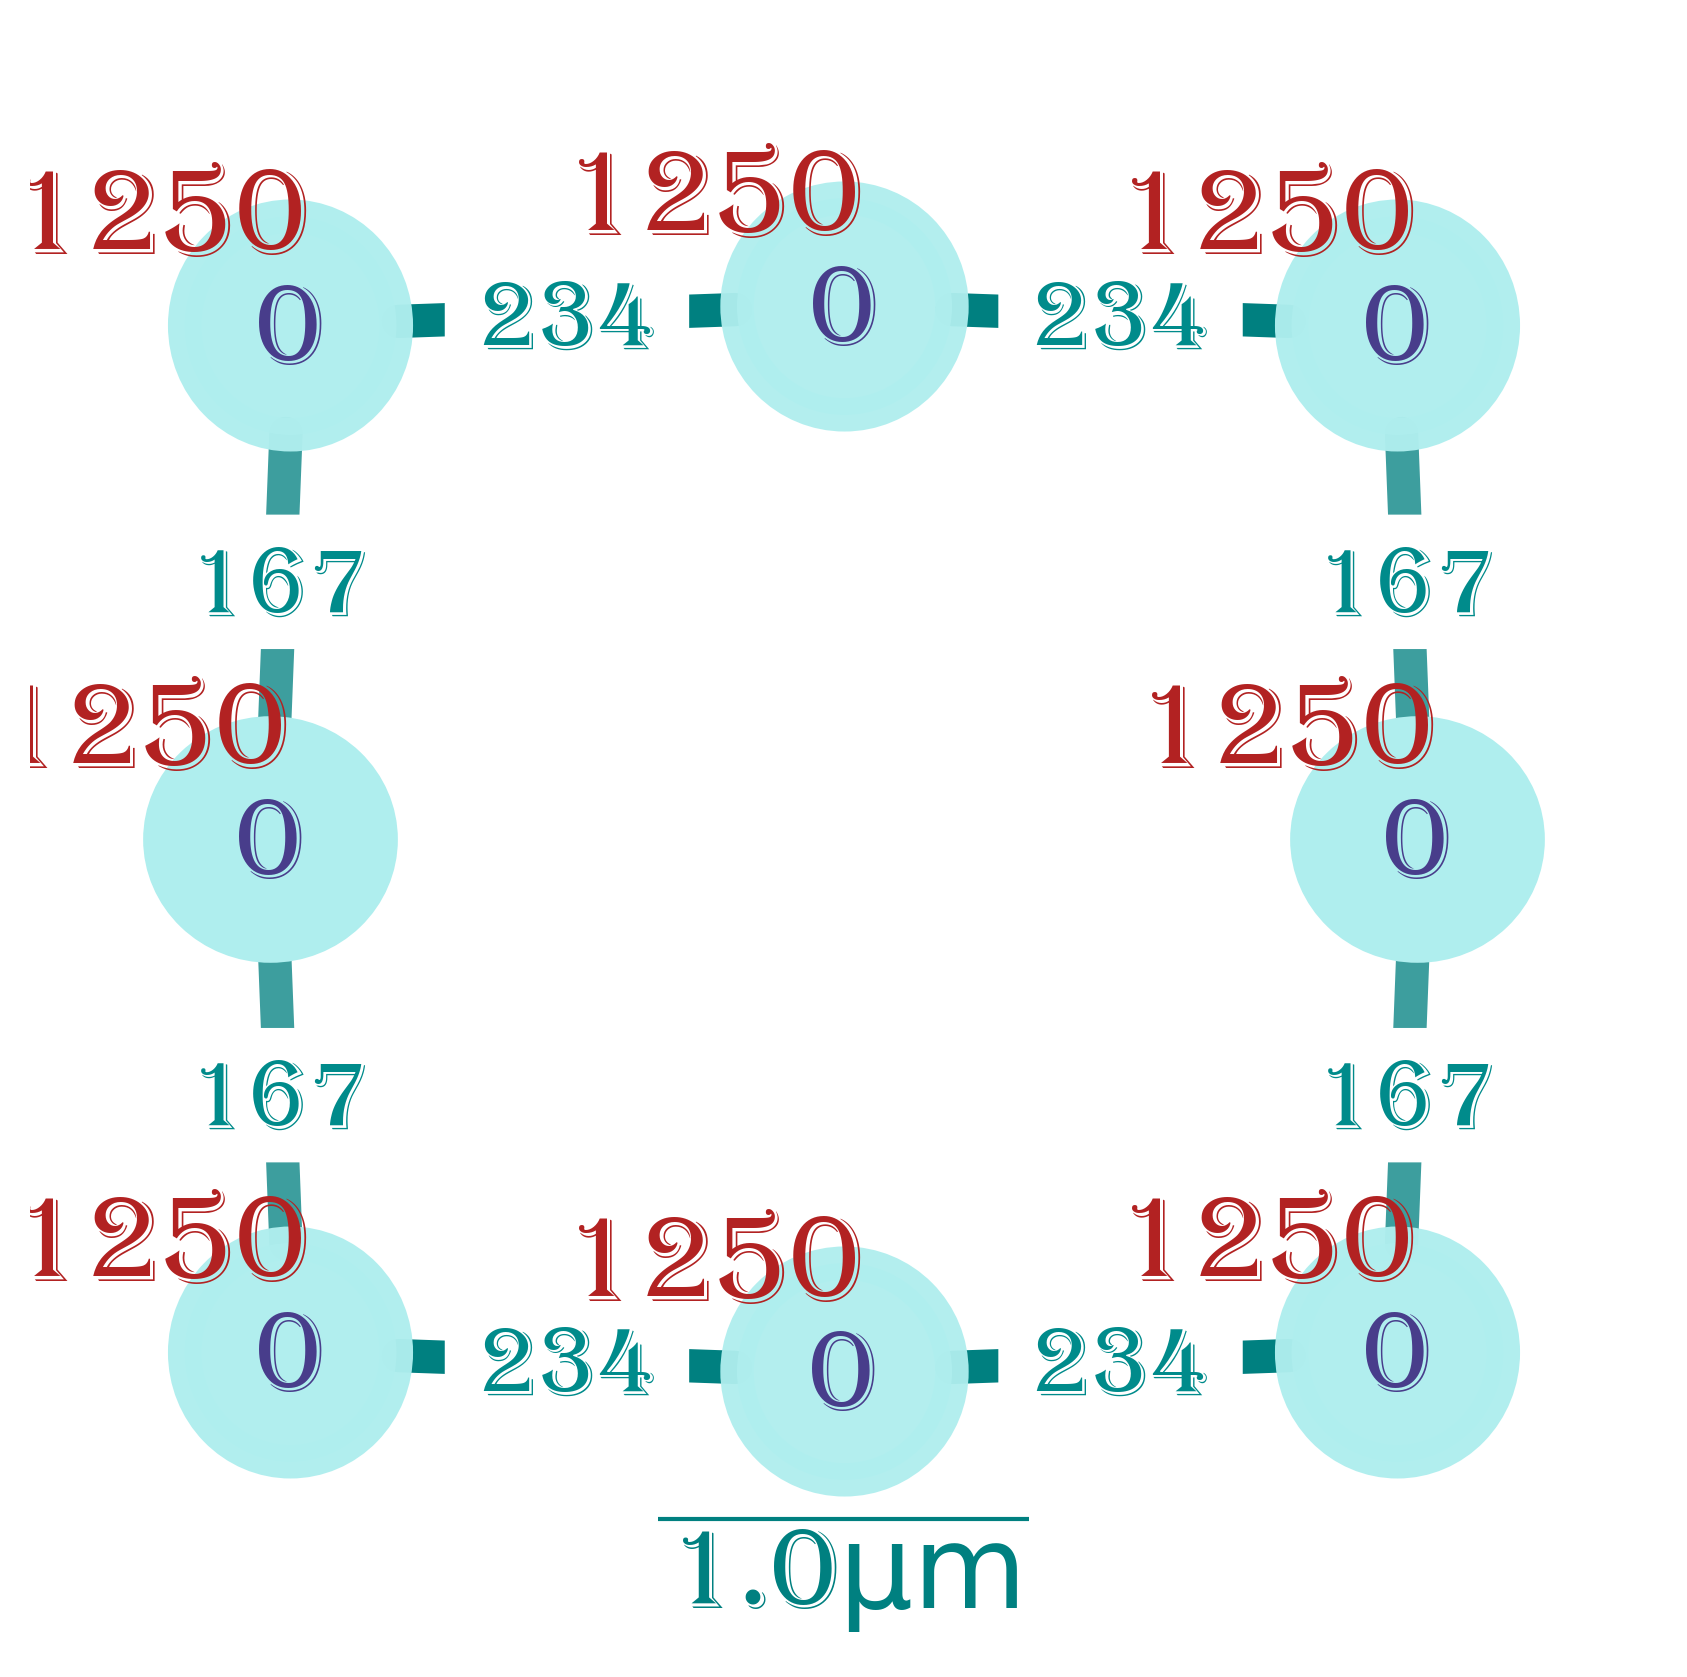

In [7]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 3
Ly = 3
d = 3
shape = "Lieb"
w = "xy"
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


### Proposal figure

In [8]:
from Hubbard.plot import *
import numpy as np
from Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = "square"
w = None
eqt = "neq"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=1550,
    ascatt=1770,
    laser=780,
    band=1,
    dim=d,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    eqtarget=eqt,
    lattice_symmetry=True,
    symmetry=True,
    verbosity=0,
)
fn = "../output/3D_8x1_square_None_neq.ini"
read_file(fn, G)
G.draw_graph(nnn=True, A=G.A, U=G.U, scalebar=False)


ModuleNotFoundError: No module named 'Hubbard'

Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.


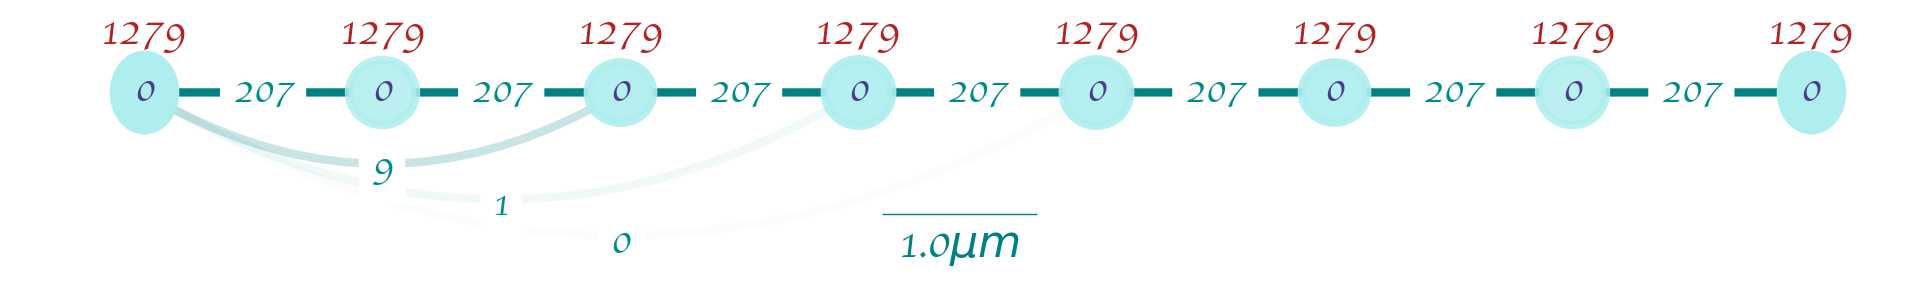

In [ ]:
from Hubbard.plot import *
import numpy as np
from Hubbard.io import *

N = 20
L = 8
Ly = 1
d = 3
shape = "square"
w = "x"
eqt = "UvT"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=1550,
    ascatt=1770,
    laser=780,
    band=1,
    dim=d,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    lattice_symmetry=True,
    symmetry=True,
    verbosity=0,
)
fn = "../output/3D_8x1_square_x_UvT_trf.ini"
read_file(fn, G)
G.draw_graph(nnn=True, A=G.A, U=G.U, scalebar=True)
